In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('light')

numBlocks = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384])
numThreads = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

result_async = np.zeros((len(numBlocks), len(numThreads)))
result_sync = np.zeros((len(numBlocks), len(numThreads)))

data = np.loadtxt("results.txt", delimiter=",")

for i in range(len(numBlocks)):
    for j in range(len(numThreads)):
        result_async[i][j] = data[i*len(numThreads) + j][2]
        result_sync[i][j] = data[i*len(numThreads) + j][3]

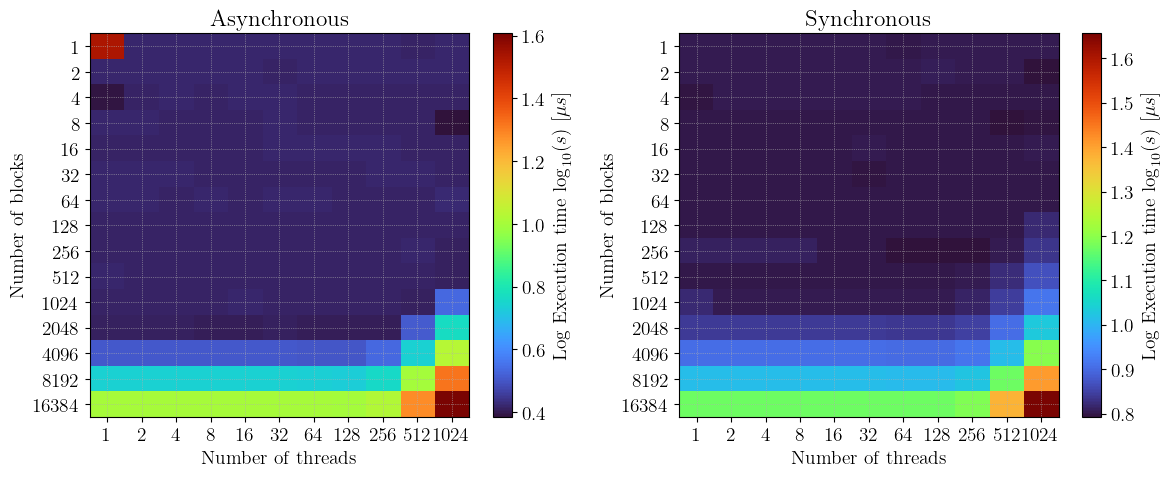

In [2]:
fig, ax = plt.subplots(1,2, figsize=(12,5))


im = ax[0].imshow(np.log10(result_async), cmap='turbo', interpolation='nearest', aspect='auto')
cbar = plt.colorbar(im, ax=ax[0])
cbar.set_label('Log Execution time $\log_{10}(s)$ [$\mu s$]')
ax[0].set_xticks(np.arange(len(numThreads)))
ax[0].set_xticklabels(numThreads)
ax[0].set_yticks(np.arange(len(numBlocks)))
ax[0].set_yticklabels(numBlocks)
ax[0].set_ylabel("Number of blocks")
ax[0].set_xlabel("Number of threads")
ax[0].set_title("Asynchronous")

im = ax[1].imshow(np.log10(result_sync), cmap='turbo', interpolation='nearest', aspect='auto')
cbar = plt.colorbar(im, ax=ax[1])
cbar.set_label('Log Execution time $\log_{10}(s)$ [$\mu s$]')
ax[1].set_xticks(np.arange(len(numThreads)))
ax[1].set_xticklabels(numThreads)
ax[1].set_yticks(np.arange(len(numBlocks)))
ax[1].set_yticklabels(numBlocks)
ax[1].set_ylabel("Number of blocks")
ax[1].set_xlabel("Number of threads")
ax[1].set_title("Synchronous")

plt.tight_layout()

plt.savefig("async_sync.png", dpi=300)
plt.show()

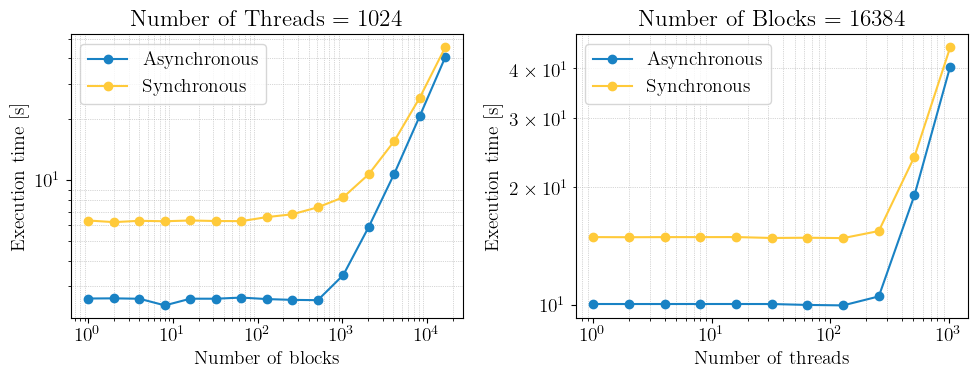

In [4]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(numBlocks, result_async[:, -1], "o-", label="Asynchronous")
ax[0].plot(numBlocks, result_sync[:, -1], "o-", label="Synchronous")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].legend()
ax[0].grid(which="both")
ax[0].set_xlabel("Number of blocks")
ax[0].set_ylabel("Execution time [s]")
ax[0].set_title("Number of Threads = 1024")

ax[1].plot(numThreads, result_async[-1,:], "o-", label="Asynchronous")
ax[1].plot(numThreads, result_sync[-1,:], "o-", label="Synchronous")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].legend()
ax[1].grid(which="both")
ax[1].set_xlabel("Number of threads")
ax[1].set_ylabel("Execution time [s]")
ax[1].set_title("Number of Blocks = 16384")

plt.tight_layout()
plt.savefig("async_sync_2.png", dpi=300)
